In [1]:
import sys
#!{sys.executable} -m pip install tangled_up_in_unicode
#!conda install --yes --prefix {sys.prefix} numba

In [2]:
import pandas as pd

In [3]:
print("hello world")

hello world


In [4]:
import numpy as np

In [5]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn import (
        ensemble,
        preprocessing,
        tree)
import yellowbrick as yb
from yellowbrick.model_selection import(
        LearningCurve,
        )

import sklearn as sk
from sklearn.model_selection import train_test_split

import pandas_profiling

import tangled_up_in_unicode

C:\Users\liptr\.conda\envs\titanic_2\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
url = (
       "http://biostat.mc.vanderbilt.edu/"
       "wiki/pub/Main/DataSets/titanic3.xls"
       )
df = pd.read_excel(url)
orig_df = df

In [7]:
pandas_profiling.ProfileReport(df)

In [8]:
df.describe().iloc[:, :2]

#this counts the number of null values in each column
df.isnull().sum()

#The percentage of null values in each frame
df.isnull().mean()

#The sum of null values in the first 10 values
df.isnull().sum(axis=1).loc[:10]

mask = df.isnull().any(axis=1)

mask.head()

df[mask].body.head()
#I'm actually not sure what making head was for here. It's supposed to be fore inspecting rows with
#Data, but thay appear to all have missing values. weird.

0      NaN
1      NaN
2      NaN
3    135.0
4      NaN
Name: body, dtype: float64

In [9]:
#next we look at sex
df.sex.value_counts(dropna=False)
#looks like none of them are na in the sex column that's nice. let's look at 
#emberaked
df.cabin.value_counts(dropna=False)
#same for embarked
df.embarked.value_counts(dropna=False)
#just like before, two people missing. 

df.describe


<bound method NDFrame.describe of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin em

In [10]:
df = df.drop(
        columns=[
        "name",
        "ticket",
        "home.dest",
        "boat",
        "body",
        "cabin",
        ]
    )

df.describe

df.columns

df = pd.get_dummies(df)

df.columns

#looks good, but now we have a reduncancy between sex male and sex female

df = df.drop(columns = "sex_male")

df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [11]:
# Hot!

# Now I split the data frame in two, a data frame with all the features and vector/series/list with the survived

y = df.survived
X = df.drop(columns = "survived")

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
        X, y, test_size=0.3, random_state=42
        )


In [12]:
    from sklearn.experimental import(
        enable_iterative_imputer,
)
    from sklearn import impute

In [13]:
# make a list called num_cols with all of the already numeric columsn
# num_cols = [
# "age",
# "pclass",
# "fare",
# "sibsp",
# "parch",
# "sex_female"]

# imputer = impute.IterativeImputer(random_state=42)
# imputed = imputer.fit_transform(X_train[num_cols])
# X_train.loc[:,num_cols] = imputed
# imputed = imputer.transform(X_test[num_cols])
# X_test.loc[:,num_cols] = imputed

In [14]:
meds = X_train.median()
X_train = X_train.fillna(meds)
X_test = X_test.fillna(meds)

In [15]:
cols = "pclass,age,fare,sibsp".split(",")
cols

['pclass', 'age', 'fare', 'sibsp']

In [16]:
sca = preprocessing.StandardScaler()
sca

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
X_train[['pclass', 'age', 'fare', 'sibsp']] = sca.fit_transform((X_train[['pclass', 'age', 'fare', 'sibsp']]))


In [18]:
X_test[['pclass', 'age', 'fare', 'sibsp']] = sca.fit_transform((X_test[['pclass', 'age', 'fare', 'sibsp']]))

In [19]:
X_test


,pclass,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
1148,0.882021,0.289464,-0.433273,0,-0.513001,0,0,0,1
1049,0.882021,-0.785822,0.637647,1,-0.337639,0,1,0,0
982,0.882021,-0.212336,-0.433273,0,-0.497314,0,0,0,1
808,0.882021,-0.212336,-0.433273,0,-0.494176,0,0,0,1
1195,0.882021,-0.212336,-0.433273,0,-0.500281,0,0,1,0
...,...,...,...,...,...,...,...,...,...
325,-0.325764,-0.068965,-0.433273,0,-0.393436,0,0,0,1
919,0.882021,-0.893351,-0.433273,0,-0.510880,0,1,0,0
532,-0.325764,0.719578,-0.433273,0,-0.393436,0,0,0,1
1159,0.882021,-0.212336,-0.433273,0,-0.494176,1,0,0,1






#make baseline model
from sklearn.dummy import DummyClassifier
bm = DummyClassifier()
bm.fit(X_train, y_train)
bm.score(X_test, y_test)

In [20]:
# X_test = sca.transform(X_test)
# X_test = pd.DataFram(X_test, columns=cols)

In [21]:
nullaronis = X_train[X_train.age.isnull()]

In [22]:
nullaronis.index

Int64Index([], dtype='int64')

In [23]:
#define a function to do all of the beginning changes

def first_changes(
df
):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

In [24]:
#define a function to do the more advanced splitting changes

def split_change(
df, y_col, size=0.3, std_cols = None):

    y = df[y_col]
    X = df.drop(columns = y_col)
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
        X, y, test_size=size, random_state=42
        )
    #Now it imputes values using medians. This is a nice simple way to do it.
    meds = X_train.median()
    X_train = X_train.fillna(meds)
    X_test = X_test.fillna(meds)
    #Now split change scales the numeric features
    cols = "pclass,age,fare,sibsp".split(",")
    sca = preprocessing.StandardScaler()
    X_train[['pclass', 'age', 'fare', 'sibsp']] = sca.fit_transform((X_train[['pclass', 'age', 'fare', 'sibsp']]))
    X_test[['pclass', 'age', 'fare', 'sibsp']] = sca.fit_transform((X_test[['pclass', 'age', 'fare', 'sibsp']]))
    #
    
    return X_train, X_test, y_train, y_test

In [25]:
#code for checking the two above functions. Recreates the df from online and runs the first_changes and split_change on them

def checker(
    url = (
           "http://biostat.mc.vanderbilt.edu/"
           "wiki/pub/Main/DataSets/titanic3.xls"
           )):
    df = pd.read_excel(url)
    orig_df = df

    df = first_changes(df)

    return(split_change(df, y_col = "survived"))

In [26]:
# Now we build a first model with a random forest classifier

from sklearn.ensemble import(
    RandomForestClassifier,
)
rf = RandomForestClassifier(random_state=179)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.7888040712468194

C:\Users\liptr\.conda\envs\titanic_2\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\liptr\.conda\envs\titanic_2\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


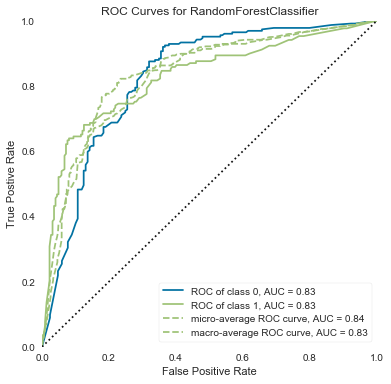

In [27]:
# And create an ROC curve to evaluate the model
from yellowbrick.classifier import ROCAUC

fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(rf)
roc_viz.score(X_test, y_test)
roc_viz.poof()